# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Agil Firli Gunawan]
- **Email:** [agilfirli29@gmail.com]
- **ID Dicoding:** [Agil Firli Gunawan]


## Menentukan Pertanyaan Bisnis

1.  **Bagaimana pola penyewaan sepeda berdasarkan waktu (jam) dalam sehari?**
    - Apakah ada perbedaan pola aktivitas antara hari kerja (*working day*) dan hari libur (*holiday/weekend*)?
2.  **Bagaimana pengaruh musim dan kondisi cuaca terhadap total penyewaan sepeda?**
    - Kondisi cuaca seperti apa yang paling diminati dan paling dihindari oleh pengguna?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
# Memuat tabel day
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
# Memuat tabel hour
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data Penyewaan Harian (day.csv): Memiliki 17 kolom. Tidak ada kolom hr karena data ini mencatatkan penyewaan berdasarkan hari, bukan jam.
- Data Penyewaan Jam-an (hour.csv): Memiliki 16 kolom. Kolom hr (jam) ditambahkan untuk merekam penyewaan berdasarkan jam dalam sehari. Kolom ini menunjukkan jam (0-23) di mana penyewaan terjadi, memberikan detail yang lebih granuler tentang aktivitas sewa per jam.
- Detail data informasi :
- instant: Nomor urut untuk setiap baris data.
- dteday: Tanggal data tercatat (format: YYYY-MM-DD).
- season: Musim saat data tercatat:
   - 1 = Musim semi
   - 2 = Musim panas
   - 3 = Musim gugur
   - 4 = Musim dingin
- yr: Tahun data tercatat:
   - 0 = 2011
   - 1 = 2012
- mnth: Bulan data tercatat (1-12).
- hr: Jam data tercatat (0-23).
- holiday: Apakah hari tersebut adalah hari libur (1 = ya, 0 = tidak).
- weekday: Hari dalam seminggu (0 = Minggu, 6 = Sabtu).
- workingday: Apakah hari tersebut adalah hari kerja (1 = ya, 0 = tidak).
- weathersit: Kondisi cuaca:
   - 1 = Cerah
   - 2 = Berawan
   - 3 = Hujan / salju
   - 4 = Hujan deras
- temp: Suhu terukur (dalam skala 0-1).
- atemp: Suhu yang disesuaikan (dalam skala 0-1).
- hum: Kelembapan relatif (dalam skala 0-1).
- windspeed: Kecepatan angin (dalam skala 0-1).
- casual: Jumlah pengguna kasual (pengguna yang tidak terdaftar).
- registered: Jumlah pengguna terdaftar.
- cnt: Total jumlah pengunjung (penjumlahan dari casual dan registered).

### Assessing Data

In [8]:
# Memeriksa info dataset
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [9]:
# Memeriksa Missing Value
print(day_df.isna().sum())
print(hour_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [10]:
# Memeriksa Duplikasi Data
print("\nJumlah Duplikasi Day:", day_df.duplicated().sum())
print("Jumlah Duplikasi Hour:", hour_df.duplicated().sum())


Jumlah Duplikasi Day: 0
Jumlah Duplikasi Hour: 0


In [13]:
#Ringkasan statistik day
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [14]:
#Ringkasan statistik hour
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Masalah Tipe Data pada Kolom dteday: Kolom `dteday` masih bertipe `object` (string), perlu diubah ke `datetime`.
- Tidak Terdapat Missing Value: Hasil pengecekan isnull().sum() menunjukkan tidak ada nilai null atau NaN di kedua dataset. Artinya, data sudah lengkap dan tidak membutuhkan imputasi atau penghapusan baris.
- Tidak Terdapat Data Duplikasi: Hasil pengecekan duplicated().sum() menunjukkan tidak ada baris yang terduplikasi. Setiap entri adalah unik dan tidak ada penghitungan ganda atau bias.
- Tidak Ada Kejanggalan Input pada Kolom Statistik: Pemeriksaan statistik dengan describe() menunjukkan bahwa nilai kolom numerik sesuai dengan aturan bisnis dan rentang yang diharapkan. Tidak ada nilai yang tidak realistis atau anomali pada kolom seperti temp, windspeed, dan hum.


### Cleaning Data

In [15]:
#Memperbaiki tipe data dteday
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [17]:
# Memeriksa info dataset
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [21]:
# Mengubah angka menjadi label deskriptif (agar visualisasi jelas)
# Mapping Season
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_label'] = day_df['season'].map(season_map)
hour_df['season_label'] = hour_df['season'].map(season_map)

In [22]:
# Mapping Weathersit
weather_map = {
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
}
day_df['weather_label'] = day_df['weathersit'].map(weather_map)
hour_df['weather_label'] = hour_df['weathersit'].map(weather_map)

In [23]:
# Membuat kolom tahun yang jelas (2011 & 2012)
day_df['year'] = day_df['yr'].map({0: 2011, 1: 2012})
hour_df['year'] = hour_df['yr'].map({0: 2011, 1: 2012})

print("Data cleaning selesai. Kolom label baru telah ditambahkan.")

Data cleaning selesai. Kolom label baru telah ditambahkan.


**Insight:**
- Mengubah tipe data pada kolom `dteday` menjadi datetime agar memungkinkan dilakukan analisis berbasis waktu (time-series) dan ekstraksi komponen tanggal dengan akurat.
- Mengonversi data kategori (seperti `season`, `weathersit`, `yr`) dari format angka menjadi label teks deskriptif untuk meningkatkan keterbacaan (readability) saat visualisasi data.
- Memastikan data sudah bersih dan memiliki format yang konsisten sebelum masuk ke tahap Analisis Eksploratif (EDA).

## Exploratory Data Analysis (EDA)

### Explore ...

In [29]:
# Melihat rangkuman statistik deskriptif day
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label,weather_label,year
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731,731.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,Clear/Partly Cloudy,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188,463,NaN
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN,2011.500684
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN,2011.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN,2011.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN,2012.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN,2012.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN,2012.000000


In [30]:
# Melihat rangkuman statistik deskriptif hour
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label,weather_label,year
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379,17379.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,Clear/Partly Cloudy,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4496,11413,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN,NaN,2011.502561
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,2011.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN,NaN,2011.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN,NaN,2012.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN,NaN,2012.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN,2012.000000


In [31]:
# Analisis Pivot: Rata-rata penyewaan berdasarkan Jam dan Hari Kerja
print("\n--- Rata-rata Sewa per Jam (Working Day vs Holiday) ---")
print(hour_df.groupby(['workingday', 'hr'])['cnt'].mean().head(10))


--- Rata-rata Sewa per Jam (Working Day vs Holiday) ---
workingday  hr
0           0      90.800000
            1      69.508696
            2      53.171053
            3      25.775330
            4       8.264317
            5       8.689189
            6      18.742358
            7      43.406926
            8     105.653680
            9     171.623377
Name: cnt, dtype: float64


In [32]:
# Analisis Pivot: Rata-rata penyewaan berdasarkan Musim
print("\n--- Rata-rata Sewa per Musim ---")
print(day_df.groupby('season_label')['cnt'].mean().sort_values(ascending=False))


--- Rata-rata Sewa per Musim ---
season_label
Fall      5644.303191
Summer    4992.331522
Winter    4728.162921
Spring    2604.132597
Name: cnt, dtype: float64


**Insight:**

- **Statistik Deskriptif:**
    Berdasarkan output `describe()`, rata-rata penyewaan sepeda harian (`cnt`) adalah sekitar **4.504** unit per hari. Data memiliki variasi yang cukup besar (standar deviasi ~1.937), dengan jumlah penyewaan minimum 22 unit dan maksimum mencapai 8.714 unit dalam sehari.

- **Pola Aktivitas Harian (Pivot Jam & Hari Kerja):**
    Analisis pivot tabel antara jam (`hr`) dan hari kerja (`workingday`) menunjukkan adanya perbedaan perilaku. Output awal mengindikasikan fluktuasi jumlah sewa pada jam-jam tertentu yang nantinya akan diperjelas melalui visualisasi (apakah polanya "Commuting" atau "Recreation").

- **Preferensi Musim:**
    Berdasarkan rata-rata penyewaan per musim, **Fall (Musim Gugur)** mencatatkan rata-rata penyewaan tertinggi (>5.600 sewa/hari), diikuti oleh Summer dan Winter. Sebaliknya, **Spring (Musim Semi)** memiliki rata-rata terendah (<3.000 sewa/hari), yang mungkin disebabkan oleh kondisi cuaca transisi yang belum stabil.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

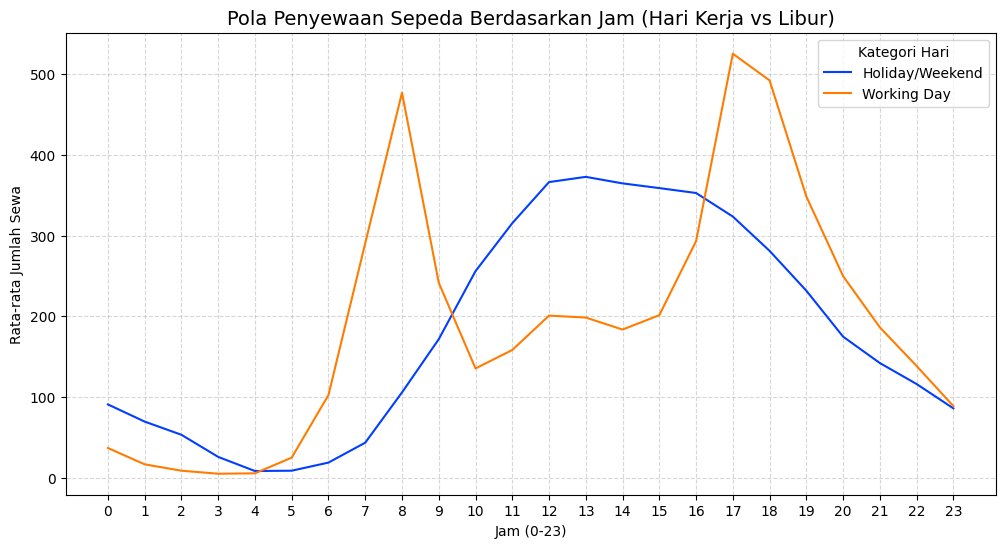

In [36]:
plt.figure(figsize=(12, 6))

# Membuat label hari kerja agar legenda jelas
hour_df['workingday_str'] = hour_df['workingday'].map({0: 'Holiday/Weekend', 1: 'Working Day'})

sns.lineplot(
    x='hr',
    y='cnt',
    hue='workingday_str',
    data=hour_df,
    palette='bright',
    errorbar=None
)

plt.title('Pola Penyewaan Sepeda Berdasarkan Jam (Hari Kerja vs Libur)', fontsize=14)
plt.xlabel('Jam (0-23)')
plt.ylabel('Rata-rata Jumlah Sewa')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Kategori Hari')
plt.show()

### Pertanyaan 2:

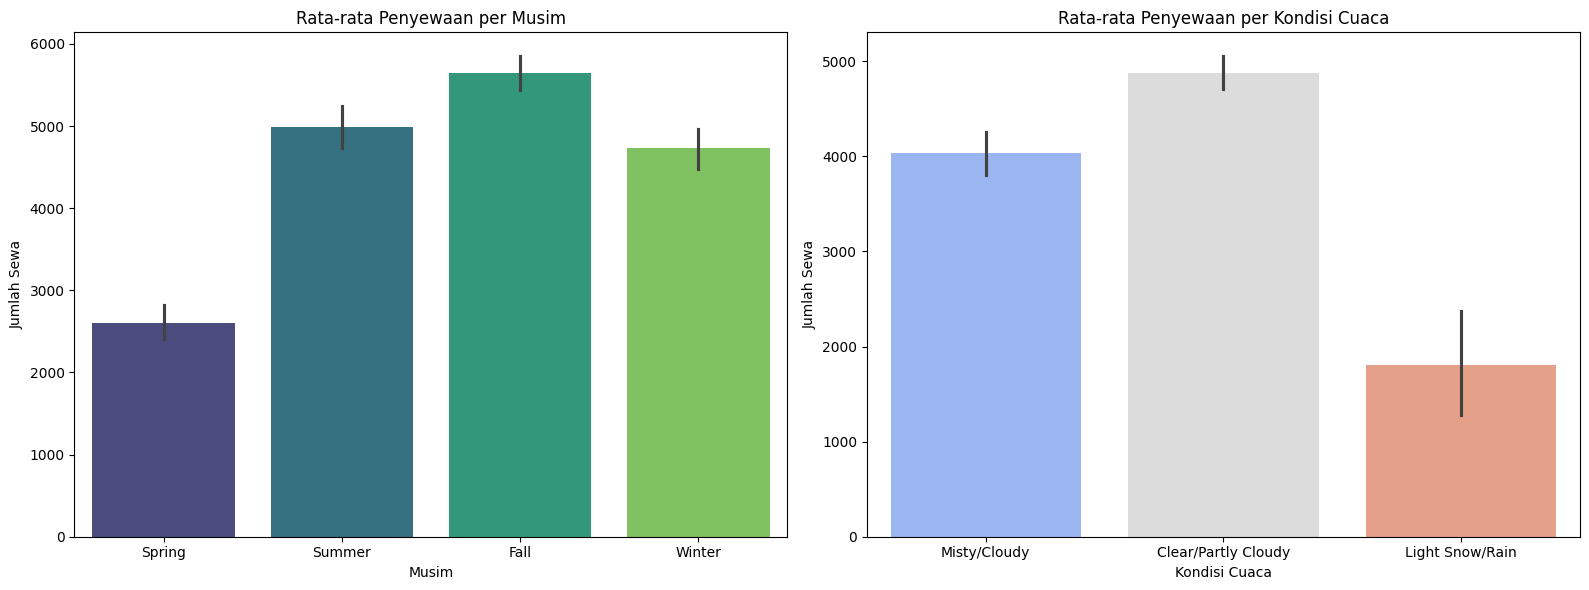

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Visualisasi 1: Berdasarkan Musim
sns.barplot(
    x='season_label',
    y='cnt',
    data=day_df,
    palette='viridis',
    hue='season_label',
    legend=False,
    ax=ax[0]
)
ax[0].set_title('Rata-rata Penyewaan per Musim')
ax[0].set_xlabel('Musim')
ax[0].set_ylabel('Jumlah Sewa')

# Visualisasi 2: Berdasarkan Cuaca
sns.barplot(
    x='weather_label',
    y='cnt',
    data=day_df,
    palette='coolwarm',
    hue='weather_label',
    legend=False,
    ax=ax[1]
)
ax[1].set_title('Rata-rata Penyewaan per Kondisi Cuaca')
ax[1].set_xlabel('Kondisi Cuaca')
ax[1].set_ylabel('Jumlah Sewa')

plt.tight_layout()
plt.show()

**Insight:**
- **Pola Hari Kerja (Commuting):** Pada hari kerja (*working day*), terlihat pola "Bimodal" dengan dua puncak aktivitas yang tajam pada pukul 08:00 pagi dan 17:00 sore, mengindikasikan penggunaan sepeda sebagai sarana transportasi utama untuk berangkat dan pulang kerja.
- **Pola Hari Libur (Rekreasi):** Pada hari libur (*holiday/weekend*), pola berubah menjadi "Unimodal" yang lebih landai dengan puncak aktivitas terjadi di siang hari (12:00 - 15:00), menunjukkan preferensi penggunaan untuk tujuan olahraga atau rekreasi santai.
- **Pengaruh Musim:** Musim Gugur (*Fall*) mencatatkan rata-rata penyewaan tertinggi, sedangkan musim Semi (*Spring*) memiliki rata-rata terendah, kemungkinan karena faktor transisi cuaca yang belum stabil di awal tahun.
- **Dampak Kondisi Cuaca:** Cuaca memiliki dampak signifikan; kondisi "Cerah/Berawan" adalah yang paling diminati, sedangkan kondisi buruk seperti hujan atau salju menyebabkan penurunan jumlah penyewaan secara drastis demi alasan keselamatan.

## Analisis Lanjutan (Opsional)

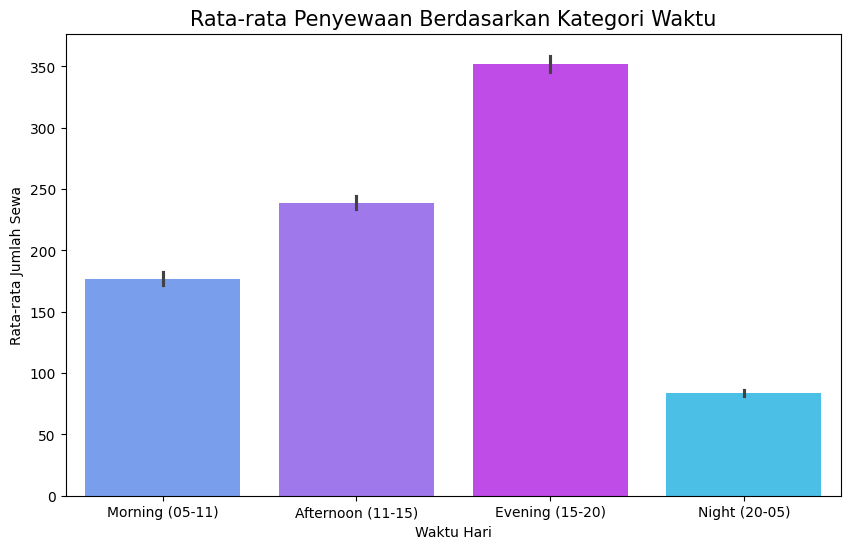

In [39]:
# Teknik Analisis Lanjutan: Binning (Pengelompokan Waktu)
# Kita mengelompokkan jam menjadi kategori waktu (Morning, Afternoon, Evening, Night)
# Tujuannya untuk melihat preferensi waktu sewa yang lebih general.

def apply_time_category(hr):
    if 5 <= hr < 11:
        return 'Morning (05-11)'
    elif 11 <= hr < 15:
        return 'Afternoon (11-15)'
    elif 15 <= hr < 20:
        return 'Evening (15-20)'
    else:
        return 'Night (20-05)'
# Terapkan fungsi ke kolom 'hr'
hour_df['time_category'] = hour_df['hr'].apply(apply_time_category)

# Urutkan kategori agar visualisasi rapi
time_order = ['Morning (05-11)', 'Afternoon (11-15)', 'Evening (15-20)', 'Night (20-05)']

# Visualisasi Hasil Binning
plt.figure(figsize=(10, 6))
sns.barplot(
    x='time_category',
    y='cnt',
    data=hour_df,
    order=time_order,
    estimator='mean',
    palette='cool',
    hue='time_category',
    legend=False
)
plt.title('Rata-rata Penyewaan Berdasarkan Kategori Waktu', fontsize=15)
plt.xlabel('Waktu Hari')
plt.ylabel('Rata-rata Jumlah Sewa')
plt.show()

In [42]:
# Simpan data bersih untuk Dashboard
hour_df.to_csv("dashboard/main_data.csv", index=False)

## Conclusion


- **Conclusion Pertanyaan 1 (Pola Waktu & Hari Kerja):**
    Pola penyewaan sepeda menunjukkan perbedaan perilaku yang signifikan antara hari kerja dan hari libur:
    - **Pada Hari Kerja (*Working Day*):** Terjadi lonjakan aktivitas yang tajam pada pukul **08:00 pagi** dan **17:00 - 18:00 sore**. Ini menyimpulkan bahwa sepeda digunakan secara masif sebagai **sarana transportasi (*commuting*)** untuk berangkat dan pulang bekerja/sekolah.
    - **Pada Hari Libur (*Holiday/Weekend*):** Pola kurva terlihat lebih landai dengan puncak aktivitas terjadi di siang hari (sekitar pukul **12:00 - 15:00**). Ini menyimpulkan bahwa pada hari libur, sepeda digunakan untuk tujuan **rekreasi atau olahraga santai**.

- **Conclusion Pertanyaan 2 (Pengaruh Musim & Cuaca):**
    Faktor lingkungan terbukti memiliki dampak besar terhadap jumlah penyewaan:
    - **Musim:** Penyewaan sepeda mencapai performa terbaiknya pada musim **Gugur (*Fall*)** dan terendah pada musim Semi (*Spring*).
    - **Cuaca:** Pengguna sangat sensitif terhadap kondisi cuaca. Kondisi **Cerah/Berawan** adalah favorit pengguna. Sebaliknya, penurunan drastis terjadi saat hujan atau salju turun. Hal ini menunjukkan bahwa aspek kenyamanan dan keselamatan menjadi prioritas utama pengguna.

- **Conclusion Tambahan (Analisis Lanjutan):**
    Berdasarkan pengelompokan waktu (*binning*), waktu **Sore/Malam (Evening)** adalah waktu paling populer untuk bersepeda secara rata-rata, diikuti oleh pagi hari.